In [120]:
from mazeAgentUtils import * 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
agent =  MazeAgent(dx=0.05,dt=0.1,mazeType='oneRoom',stateType='circles',tau=4,  alpha=0.01,nCells=200)
agent1 = MazeAgent(dx=0.05,dt=0.1,mazeType='oneRoom',stateType='circles',tau=0.0005,alpha=0.01,nCells=200)

In [142]:
agent.runRat(trainTime=30,saveEvery=2)
agent1.runRat(trainTime=30,saveEvery=2)

  0%|          | 0/18000 [00:00<?, ?it/s]

0.01735219670213975 0.002481506983580438


  0%|          | 0/18000 [00:00<?, ?it/s]

0.01704184992387118 0.003341969615699493


(<Figure size 600x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fedc404c668>)

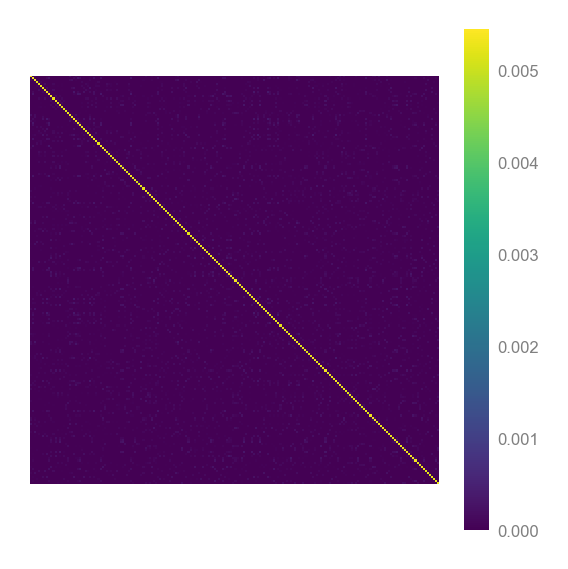

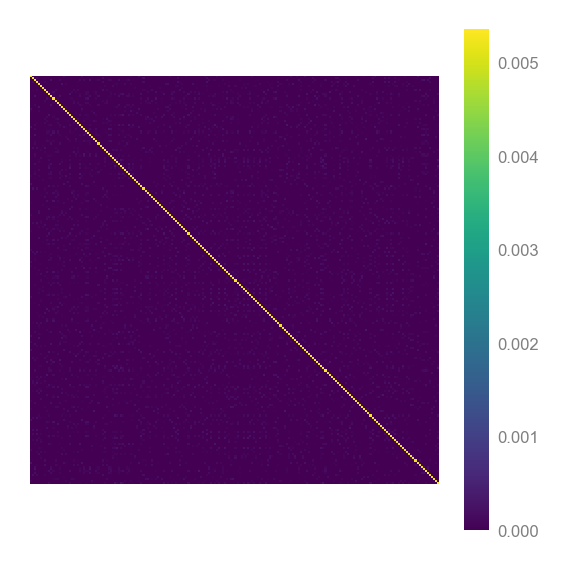

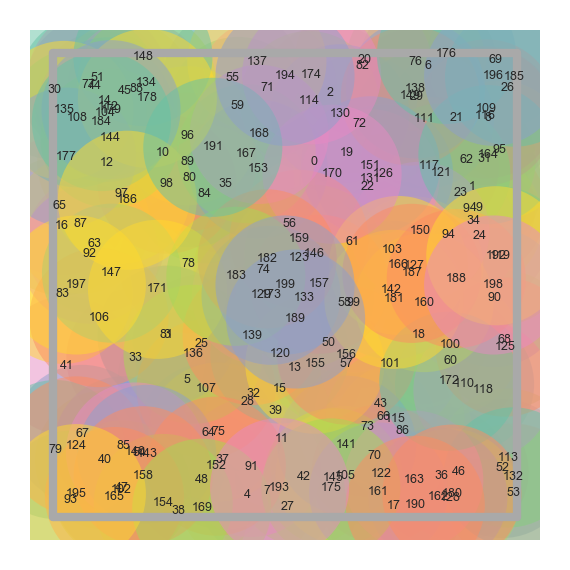

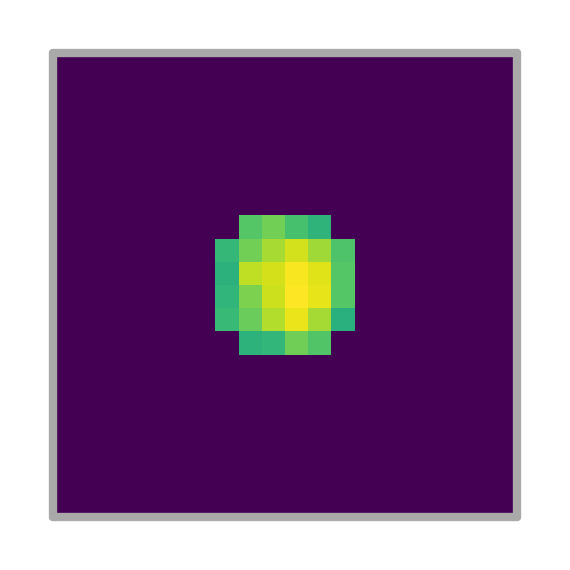

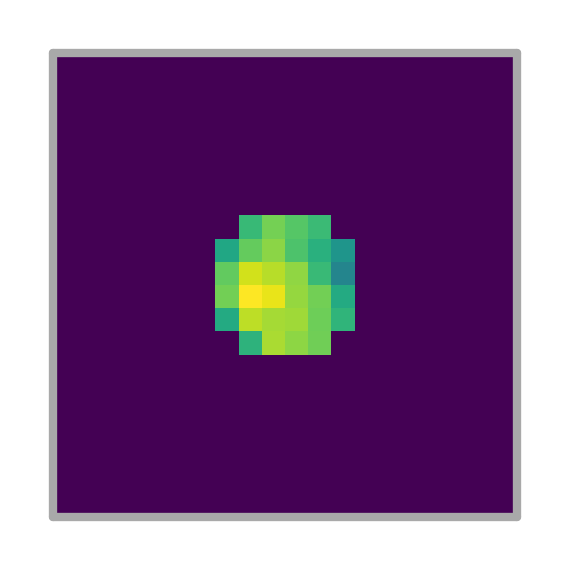

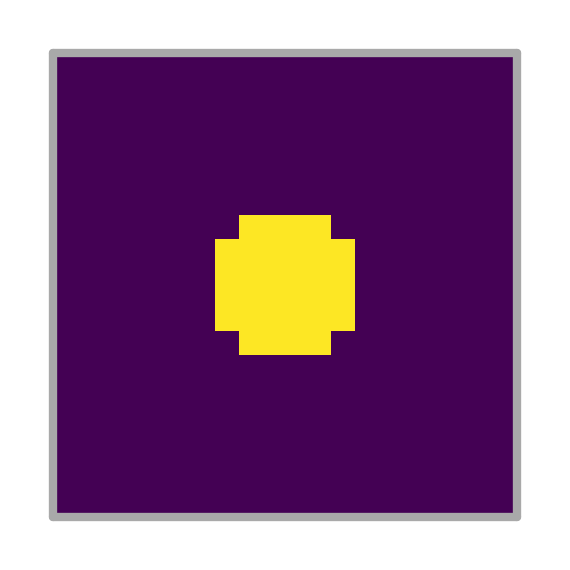

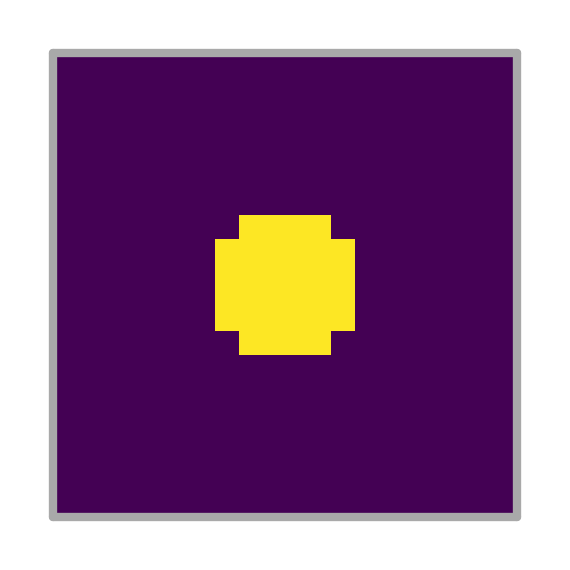

In [143]:
plotter = Visualiser(agent)
plotter1 = Visualiser(agent1)

plotter.plotM()
plotter1.plotM()

plotter.plotPlaceFields()

plotter.plotPlaceField(number=-1)
plotter1.plotPlaceField(number=-1)


plotter.plotReceptiveField(number=-1)
plotter1.plotReceptiveField(number=-1)
# plotter.plotGridField(number=20)
# plotter.plotGridField(number=15)
# plotter.plotGridField(number=25)

In [189]:
plotter.animateField(number=-1)
# plotter.animateField(number=30,field='grid')


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x600', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', './figures/animations/animplace2105041611.mp4']' returned non-zero exit status 255.

In [131]:
agent.snapshots.iloc[-1]['M']

array([[ 0.03805866,  0.00687773,  0.00047778, ..., -0.00300517,
         0.00218553, -0.0047792 ],
       [ 0.00688182,  0.0353533 ,  0.00505084, ..., -0.00627483,
         0.00198859,  0.00593436],
       [ 0.00046122,  0.00506871,  0.02813623, ...,  0.00609752,
         0.00637104, -0.00539909],
       ...,
       [-0.00310658, -0.00627829,  0.0060885 , ...,  0.03981796,
        -0.00407538,  0.0064735 ],
       [ 0.00225939,  0.00217192,  0.00646534, ..., -0.0041026 ,
         0.04113271, -0.00308663],
       [-0.00474931,  0.00588612, -0.00538647, ...,  0.00650583,
        -0.00299373,  0.04000817]])

In [71]:
agent.history['pos'][:500]

0                                      [0.2, 0.2]
1      [0.21131370849898476, 0.21131370849898476]
2       [0.2368878625431678, 0.22763151880333637]
3       [0.25127224253666697, 0.2377675212596187]
4       [0.26647097428410377, 0.2544868264967379]
                          ...                    
495      [0.5595070110985662, 0.7027595214524274]
496      [0.5665911819544182, 0.7061055759731942]
497      [0.5808051787603695, 0.7061922040059373]
498      [0.6036016919929851, 0.7064472693831483]
499       [0.621525005476218, 0.7041682491048648]
Name: pos, Length: 500, dtype: object

In [153]:
agent.discreteStates.shape



(25, 25, 500)

In [144]:
%%time 

s=0
for i in range(300*360):
    s += 1 
 Neuropixels 2.0: A miniaturized high-density probe for stable, long-term brain recordings


CPU times: user 9.12 ms, sys: 115 µs, total: 9.24 ms
Wall time: 9.3 ms


(<Figure size 600x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb1ef2c3518>)

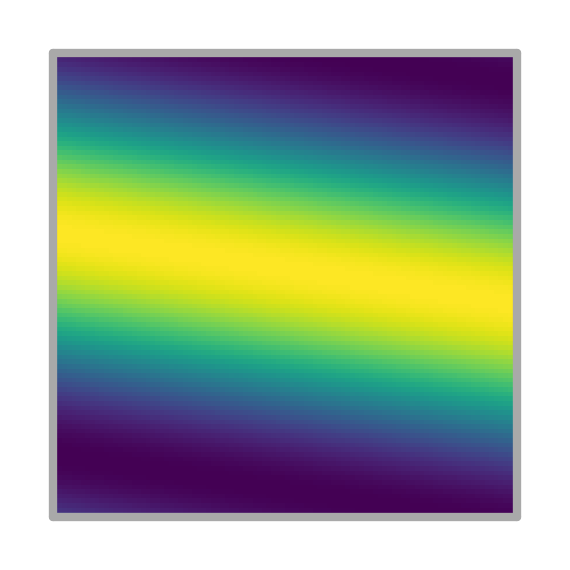

In [255]:
plotter = Visualiser(agent)
plotter.plotReceptiveField()